# Assignment- Probability of Coincidences Related to Birthdays

**Case 1:** What is the likelihood of two or more individuals sharing a birthday on the same day of the year?
You need to develop an algorithm (explaining the complexity) and write code to calculate this probability.
 Write your code to solve the problem and add in-line comments (if applicable, use ‘#’ to clarify your code). Provide charts/graphs for a better visual impact of your data (if possible, try Matplotlib). What is an acceptable number of iterations to provide a reasonably good output? How do you define the suitable number of iterations?
 Describe your solution and thinking process with a minimum of 2-3 paragraphs, including a flowchart of your algorithm—discussion about the complexity of your algorithm using the Big O notation.
Additionally, can you explain what adjustments would be necessary to calculate the likelihood of three or more people sharing a birthday? Clarify the impact on the complexity of your algorithm.

**Case 2:** Find the probability of having:
i) One birthday per month (any day of the month).
Clarification: At least one b-day per month
ii) All birthdays in a month (Calcs for each month: January to December)
Describe your solution and thinking process with a minimum of 2-3 paragraphs, including a flowchart of your algorithm—discussion about the complexity of your algorithm using the Big O notation.

**Case 3:** Write a pseudocode to calculate the average age, as well as, the youngest and the oldest person in the club efficiently.
Include a discussion of the solution and complexity using the Big O notation.
Please describe if you have any reasonable assumptions to propose a solution for the problem.
Pseudo code can either be written in LaTeX in the notebook or neatly by hand and uploaded with an image.

**Additional:** What modifications are required in your algorithm/code to solve cases 1,2 and 3 with 1,000,000 members instead of 12?
Explain the changes in 1-2 paragraphs, including either a pseudo-code or code of your updated solution.
What is  the Complexity (Big O notation) of your new algorithm?
Provide charts/graphs for a better visual impact of your data (if possible, try Matplotlib). What is an acceptable number of iterations to provide a reasonably good output? How do you define the suitable number of iterations?

#Case 1: What is the likelihood of two or more individuals sharing a birthday on the same day of the year?

##Theoretical Solution:

same_bday() caluculates the exact theoretical probability by multiplying probabilities of all individuals having different birthdays then finding the complement:

In [ ]:
def same_bday(n):
  prob_a= 1 #define initial probability
  num_iterations = 0 #for iteration count
  for i in range(364,365-n, -1): #iterate through possible number of birthdays
    num_iterations += 1
    prob_a = prob_a * (i/365) #calculate probability as current prob * next prob in sequence
  #print('Probability that two or more of the', n, 'individuals share a birthday:', 1- prob_a), print('Number of iterations:',num_iterations)
  return 1 - prob_a #return complement, at least two people share a birthday

same_bday(12)

0.1670247888380645

##Simulation Solution

same_bday_sim() runs a probability simulation by sampling birthdays of n number of people and checking if two or more have the same birthday. This output can be compared to the theoretical probability.


In [ ]:
import random
def same_bday_sim(n,t):
    same_bday = 0 #itialize count for same bday check
    for trials in range(t):
      total_bdays = [] #empty list to store all bdays
      for i in range(n):
        total_bdays.append(random.randint(0,365)) #randomly samply for n birthdays and add to list
      duplicate_check = set(total_bdays) #make set of bday list, to remove duplicates
      if len(total_bdays) != len(duplicate_check): #if lengths of list and set are different, there are duplicates
        same_bday += 1 #count trials where duplicates occur

    return same_bday/t #return probability for success/ total trials

same_bday_sim(12,10000) #example run, 12 people and 10000 trials

0.1698

##Visual Comparison of Theoretical vs. Simulated Probabilities

Generating plots for comparison of theoretical and simulated probabilities for a variety of trial numbers.

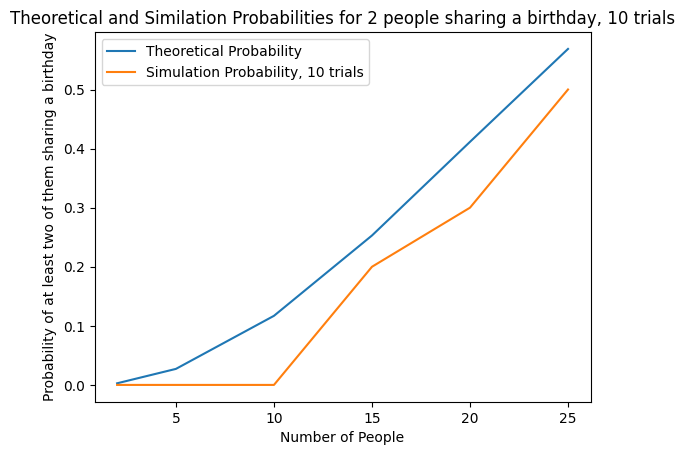

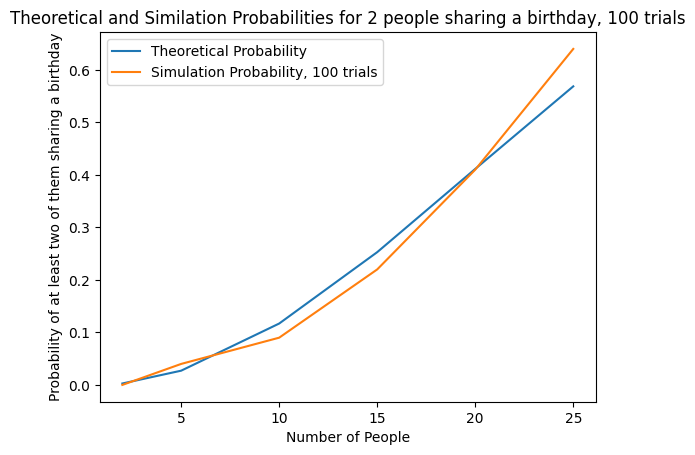

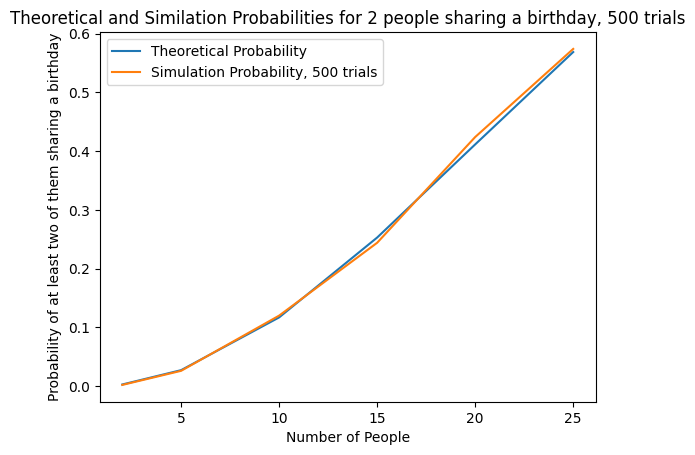

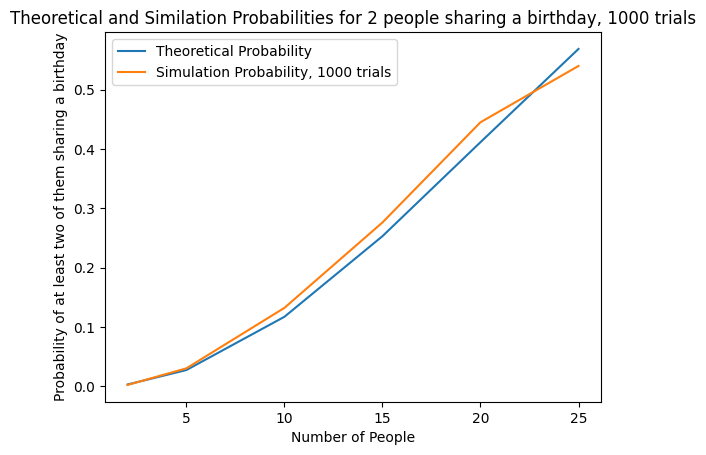

In [ ]:
import matplotlib.pyplot as plt

#generating data to plot
num_people = [2,5,10,15,20,25]
theoretical_prob = []
for i in num_people:
  result = same_bday(i) #running each num_people through same_bday and recording result
  theoretical_prob.append(result)

simulation_prob_10 = []
for i in num_people:
  t=10
  result = same_bday_sim(i,t) #running same_bday_sim 10 times and recording result
  simulation_prob_10.append(result)

simulation_prob_100 = []
for i in num_people:
  t=100
  result = same_bday_sim(i,t) #running same_bday_sim 100 times and recording result
  simulation_prob_100.append(result)

simulation_prob_500 = []
for i in num_people:
  t=500
  result = same_bday_sim(i,t) #running same_bday_sim 500 times and recording result
  simulation_prob_500.append(result)


simulation_prob_1000 = []
for i in num_people:
  t=1000
  result = same_bday_sim(i,t) #running same_bday_sim 1000 times and recording result
  simulation_prob_1000.append(result)


plt.plot(num_people, theoretical_prob, label = "Theoretical Probability")
plt.plot(num_people, simulation_prob_10, label = "Simulation Probability, 10 trials")
plt.title('Theoretical and Similation Probabilities for 2 people sharing a birthday, 10 trials')
plt.xlabel('Number of People')
plt.ylabel('Probability of at least two of them sharing a birthday')
plt.legend()
plt.show()

plt.plot(num_people, theoretical_prob, label = "Theoretical Probability")
plt.plot(num_people, simulation_prob_100, label = "Simulation Probability, 100 trials")
plt.title('Theoretical and Similation Probabilities for 2 people sharing a birthday, 100 trials')
plt.xlabel('Number of People')
plt.ylabel('Probability of at least two of them sharing a birthday')
plt.legend()
plt.show()

plt.plot(num_people, theoretical_prob, label = "Theoretical Probability")
plt.plot(num_people, simulation_prob_500, label = "Simulation Probability, 500 trials")
plt.title('Theoretical and Similation Probabilities for 2 people sharing a birthday, 500 trials')
plt.xlabel('Number of People')
plt.ylabel('Probability of at least two of them sharing a birthday')
plt.legend()
plt.show()

plt.plot(num_people, theoretical_prob, label = "Theoretical Probability")
plt.plot(num_people, simulation_prob_1000, label = "Simulation Probability, 1000 trials")
plt.title('Theoretical and Similation Probabilities for 2 people sharing a birthday, 1000 trials')
plt.xlabel('Number of People')
plt.ylabel('Probability of at least two of them sharing a birthday')
plt.legend()
plt.show()



##Explanation and Discussion

same_bday() iterates through the possible number of birthdays and calculates the probability that no people in the group share a birthday and subtracts that from one. In order to calculate the probability that no people in the group share a birthday we calculate the probability as the current probability multiplied by the next probability in the sequence. We then subtracted that number from 1 to return the probability that two people share a birthday. As the number of people in the group (n) expands, the probability that two people share the same birthday increases proportionally. The time complexity of same_bday() is O(n), because the for loop iterates n times and the total time the algorithm takes to run is proportional to the size of n.

same_bday_sim samples n number of people's birthdays and checks if there are duplicates. This is done by generating a list of birthdays, then a set of that list. The set will not contain duplicates, so the comparison of the lengths of the list and set reveals whether two people had the same birthday. This simulation can be run thousands of times to find the total probability by dividing number of successes(trials that contained duplicate birthdays) but the total number of trials. The graphs above compare the theoretical data (blue) to the simulation data (orange) and each graph has an increased amount of simulation trials. The two lines get closer as more trials are run. The graphs show that a reasonable amount of trials to get close to the theoretical probability is ~500 trials. The lines for 10 trials and 100 trials are significantly different from the theoretical data, while 500 and 1000 trials are nearly overlapping. Further simulation comparison could be run to determine an exact measure of acceptable iterations based on relative difference in data from theoretical values.

In order to calculate the likelihood of three or more people sharing a birthday we must change the algorithm to account for cases where two people share the same birthday by creating an inclusion clause using if statements. By checking for cases where two people share the same birthday, we iterate through n again increasing the complexity of the algorithm from O(n) to O(n^2).

See the flowchart below for a visual representation of same_bday():

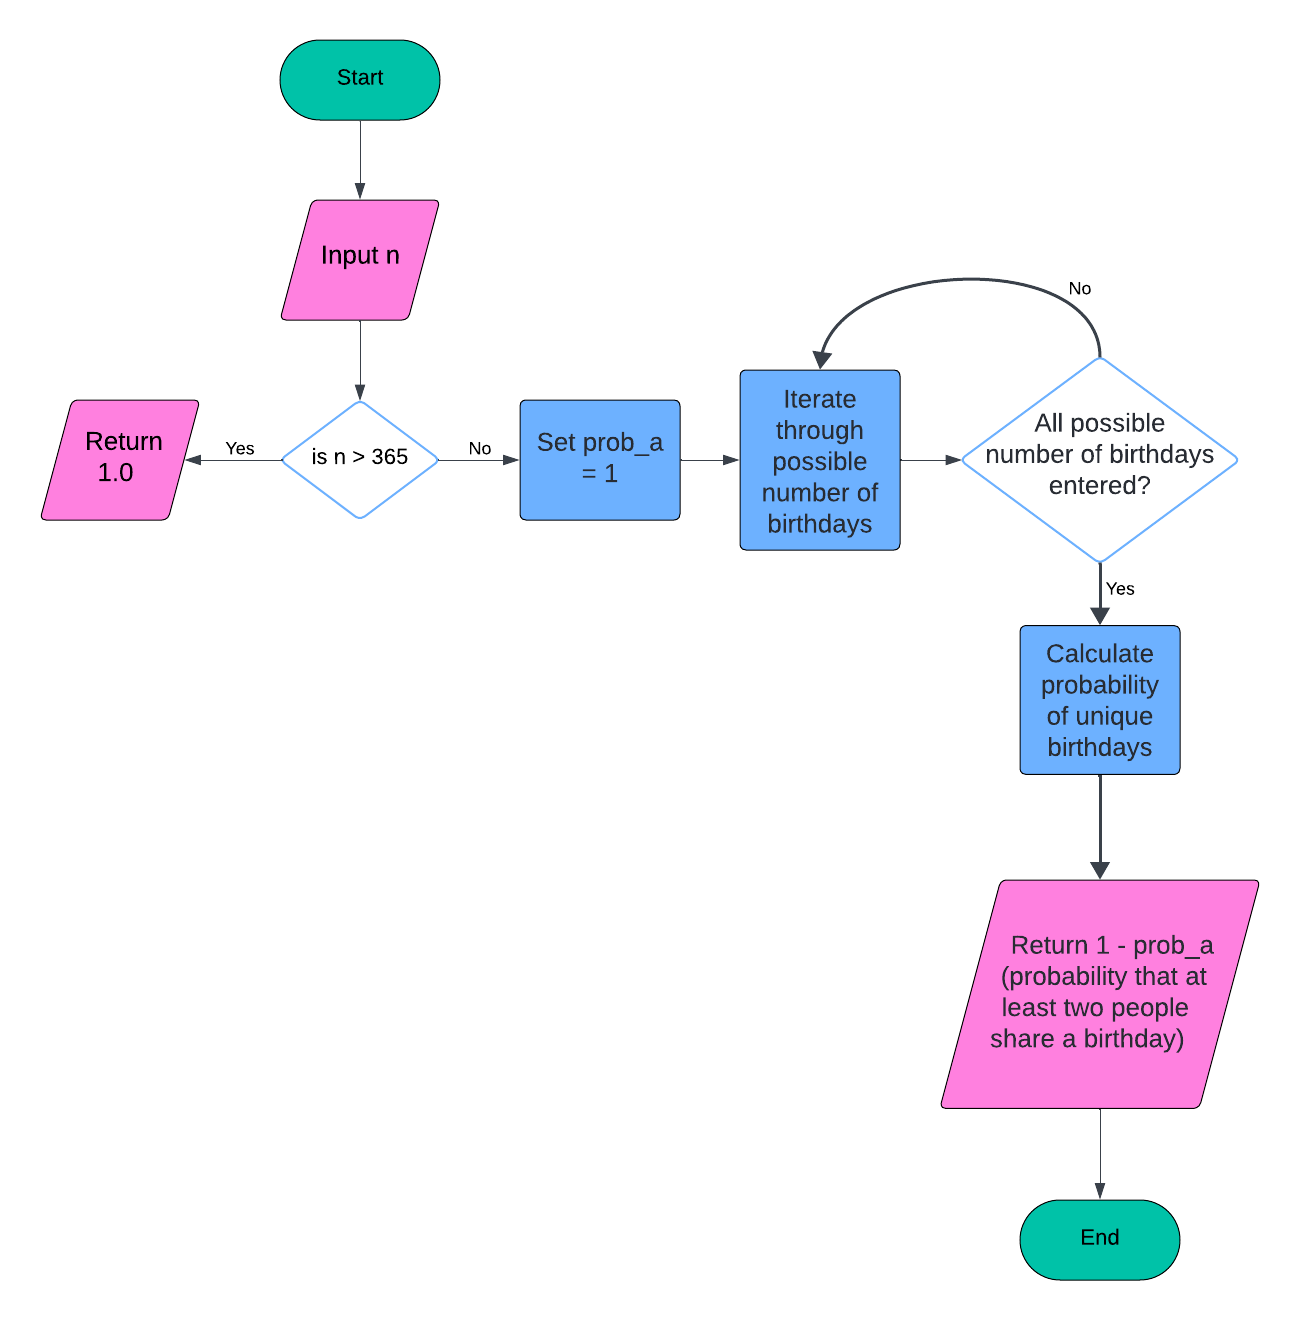

#Case 2: Find the Probability of Having: I) One Birthday per Month (Any Day of the Month)

In [ ]:
def one_per_month(n):
  days_in_month = [31, 28, 31, 30, 31, 30, 31, 31,30,31,30,31] #list of number of days in each month, by calendar year
  prob = 1 #set initial probability
  num_iterations = 1
  for i in range(n): #iterate n times (n = number of people)
    available_days = sum(days_in_month[i:]) #sum available days left for someone to have a different birthday month
    prob *= available_days/ 365 #cummulative multiplication of probability times the next person's available bdays
  return print('The probability of', n, 'people having one birthday per month is',prob, '. Number of iterations:', num_iterations)

one_per_month(12)



The probability of 12 people having one birthday per month is 5.7478758155166984e-05 . Number of iterations: 1


For Case 2 part i, we determined the probability of 12 people all having birthdays in different months. The conceptual thinking behind our algorithm is based on the following formula:

$Probability = \frac{365}{365} * \frac{365 - days\ in\ Jan}{365} * \frac{(365 - days \ in\ Jan) - days\ in\ Feb}{365} *  . . . *\frac{days\ in\ Dec}{365} $


The initial probability for person one having a birthday in their own month is 365/365. Say they have a birthday in January: now we can only succeed if the next person does not have a birthday in January. The probability of this is $\frac{365 - days\ in\ Jan}{365}$. This logic continues for each month until the 12th person can only have a birthday in December for success.


To compute this using an iterative function, we first defined a list, days_in_month, that consists of the number of days in each month (ex: there are 31 days in January, 31 is index 0 in the list). Then we iterated through n times, according to the user input for n = number of people. For each iteration, the available days left were calculated by summing days_in_month from index $i$ to the end. For January, all terms are summed but for March, terms 2 through 12 are summed, eliminating days in Jan and Feb.

Probability (initially defined as 1) is mulitpled by $\frac{available\ days}{365}$ and then set equal to probability, so the mulitplication of probability is cummulative as we iterate. The final output returns the probability that all 12 people have different birthdays.

The flowchart below visually explains the function:

![flowchart_21](https://drive.google.com/uc?export=view&id=1seZcraDWHLliZP7Xr725_k4N1VoAPtR2)


The time complexity for 2(i) is $O(n)$. The main for loop iterates through range(n). This changes with user input for a complexity of $O(n)$. The sum function that is nested does not contribute to the complexity because this is iterating through a fixed list, so this is treated as a constant.




#Case 2: Ii) All Birthdays in a Month (Calcs for Each Month: January to December)

In [ ]:
# ii) for each month, depending on number of days in month (31/365)^12

def same_month(n):
  days_in_month = [31, 28, 31, 30, 31, 30, 31, 31,30,31,30,31]
  name_of_month = ['Jan', 'Feb', 'Mar', "Apr", 'May','Jun','Jul', 'Aug', 'Sep', 'Oct', "Nov", 'Dec']
  for i in range(0,12):
    prob = (days_in_month[i]/365)**n
    print('The probability of all bdays in', name_of_month[i], 'is', prob)

same_month(12)

The probability of all bdays in Jan is 1.4087241262653472e-13
The probability of all bdays in Feb is 4.153191941063895e-14
The probability of all bdays in Mar is 1.4087241262653472e-13
The probability of all bdays in Apr is 9.504749669467184e-14
The probability of all bdays in May is 1.4087241262653472e-13
The probability of all bdays in Jun is 9.504749669467184e-14
The probability of all bdays in Jul is 1.4087241262653472e-13
The probability of all bdays in Aug is 1.4087241262653472e-13
The probability of all bdays in Sep is 9.504749669467184e-14
The probability of all bdays in Oct is 1.4087241262653472e-13
The probability of all bdays in Nov is 9.504749669467184e-14
The probability of all bdays in Dec is 1.4087241262653472e-13


For Case 2 part i, we calculated the probability of 12 people having birthdays in the same month. For each month, the probability of all birthdays in that month is $ (\frac {number\ of\ days\ in\ month}{365}) ^{12}. $ There will be slight variation between months with 31 days, months with 30 days and February with 28 days. The probability is raised to the 12th power because there are 12 people. This number will change based on user input

For the same_month(n) function, we start with defining two lists. The first list, days_in_month, lists the number of days in each month, starting with 31 days for January at index 0. The second list, name_of_month, is filled with strings of month names in order. Then, a for loop iterates 12 times, with each iteration caluculating a single months probability of having all 12 birthdays and printing the result. The probability is calculated with the formula above, indexing days_in_month to get the numerator. Then the final result is printed with its corresponding index of name_of_month for clarity. The parameter n is number of people, defined by the user.


The flowchart below visually explains the function:

![flowchart_22](https://drive.google.com/uc?export=view&id=1XM49RlV5DRNBoPIUrq20oMgXjP0ZHKDa)

The time complexity of this function is O(n). As the number of people increases by one, there is one additional multiplication that happens. For example, for 12 people, we multiply the individual month's probability 12 times. For 13 people, we multiply the individual month's probability 13 times. Thus, the algorithm's time complexity is linear.


#Case 3: Write Pseudocode to Calculate the Average Age, as Well As, the Youngest and the Oldest Person in the Club Efficiently

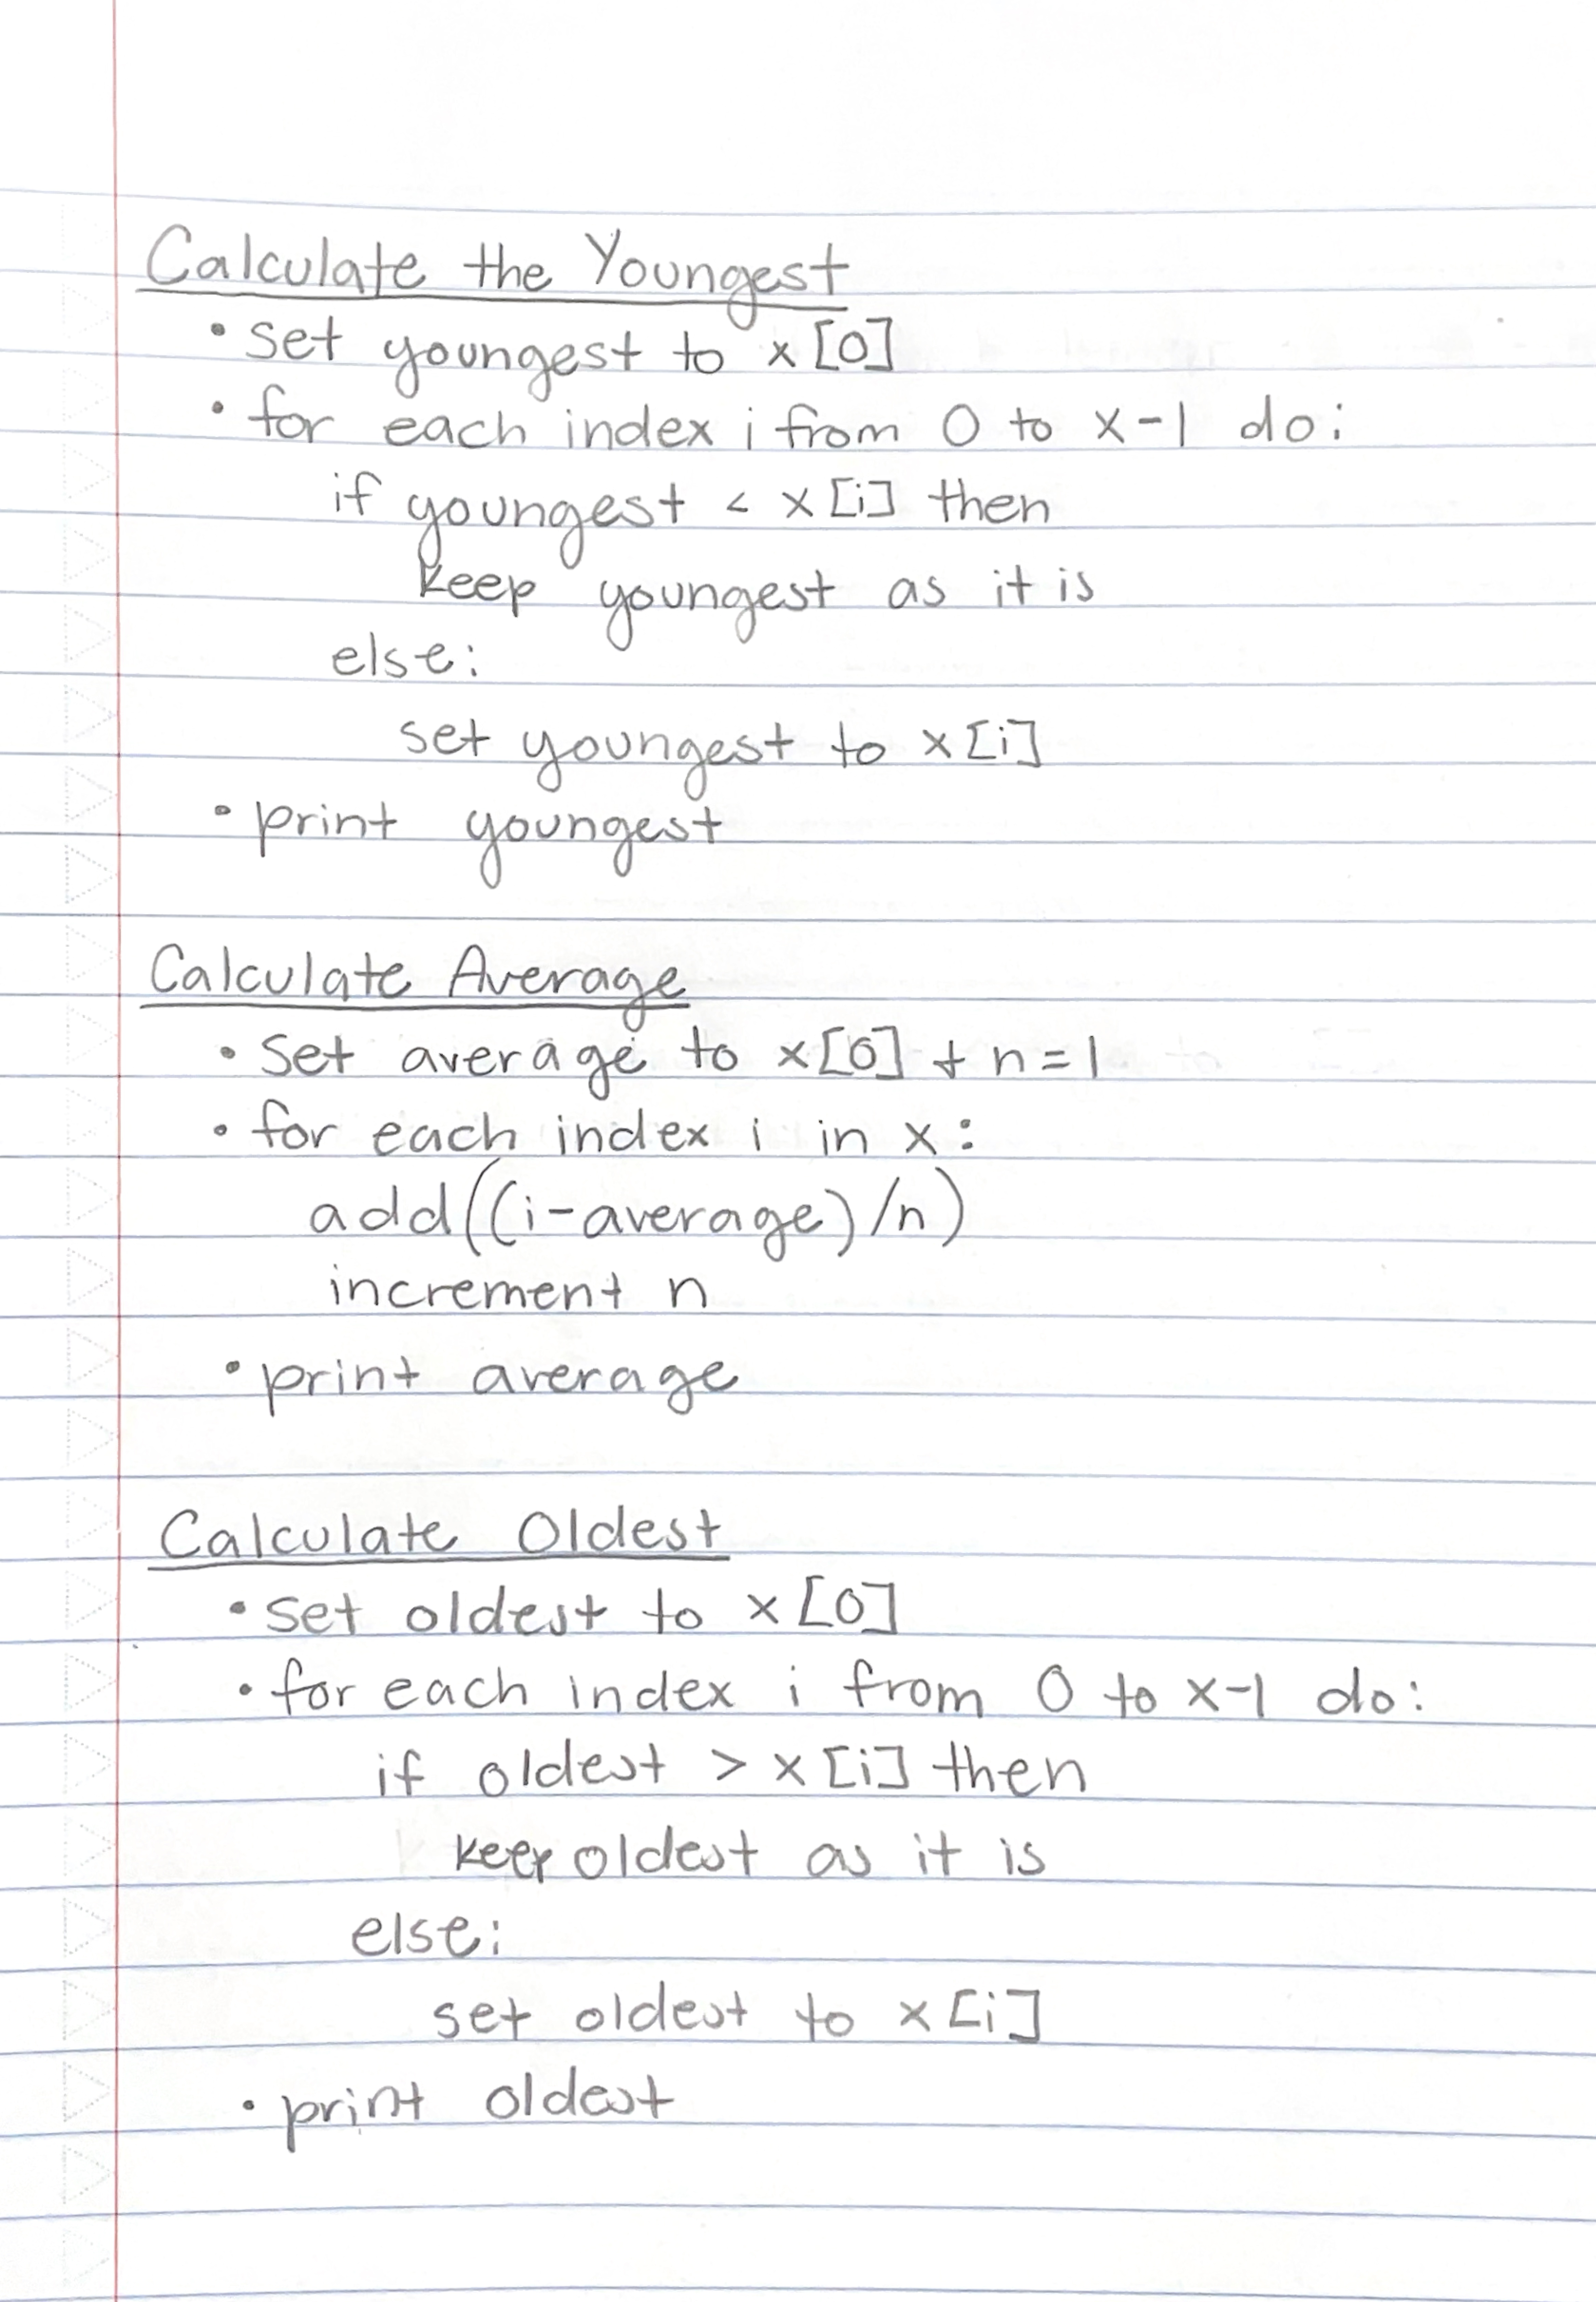

### Code With Example Data, X

In [3]:
x = [20,25, 23, 40,32,40]

average = 20
n = 1
for i in x:
  average += ((i - average )/ n)
  n = n + 1

print("average:", average)

youngest = x[0]
for i in range(len(x)):
  if youngest < x[i]:
    youngest = youngest
  else:
    youngest = x[i]

print("youngest:", youngest)

oldest = x[0]
for i in range(len(x)):
  if oldest > x[i]:
    oldest = oldest
  else:
    oldest = x[i]

print("oldest:",oldest)

average: 30.0
youngest: 20
oldest: 40


To calculate the average age of the group, you set the average to the first age in the group and n=1, then you loop through the group and add ((i-average)/n) to each element and increment n.  To calculate the youngest in the group, you set the youngest to the first age in the group, and iterate through the group from 0 to x-1 and if the youngest is less than x[i] you keep the youngest the youngest, otherwise, you set the youngest to x[i]. To calculate the oldest in the group,  you set the oldest to the first age in the group, and iterate through the group from 0 to x-1 and if the oldest is greater than x[i] you keep the oldest the oldest,  otherwise, you set the oldest to x[i]. Each of these algorithms has a time complexity of O(n) because they each iterate through the arrays one time. The only assumptions we made to propose these solutions was that we would have access to each individual’s age and not just their birthdate.

#What Modifications Are Required in Your Algorithm/Code to Solve Cases 1, 2, and 3 With 1,000,000 Members Instead of 12?

Case one:

For case one, same_birthday() assumes the number of people in the group is less than 365 as it iterates over a decreasing range of 365. If we were to accommodate for 1,000,000 people we would have to create a clause that if n is greater than 365 the algorithm should return 1 as it is guaranteed that two people will share the same birthday if there are over 365 people in the group. The time complexity would remain O(n) as the algorithm would still only iterate through the group once.

In [ ]:
#modified code:
def same_bday(n):
  if n > 365:
    return 1
  prob_a= 1
  num_iterations = 0
  for i in range(364,365-n, -1):
    num_iterations += 1
    prob_a = prob_a * (i/365)
  return 1 - prob_a

same_bday(12)

0.1670247888380645

Case two part one:

For case two part one, one_per_month() assumes the number of people in the group is 12 or less, so to accommodate for 1,000,000 people we would have to add a clause that if n > 12 return 0 as it is guaranteed that two people have the same birthday month if there are over 12 people in the group. The time complexity would remain O(n) as the algorithm would still only iterate through the group once.

In [ ]:
#modified code:

def one_per_month(n):
  days_in_month = [31, 28, 31, 30, 31, 30, 31, 31,30,31,30,31]
  prob = 1
  num_iterations = 1
  if n > 12:
    return 1
  for i in range(n):
    available_days = sum(days_in_month[i:])
    prob *= available_days/ 365
  return print('The probability of', n, 'people having one birthday per month is',prob, '. Number of iterations:', num_iterations)

one_per_month(12)


Case two part two:

For case two part two, same_month() no changes are needed to accommodate for 1,000,000 people, because the algorithm calculates per month, however, if n exceeds a certain value it will yield values close to 0, so the algorithm may be trivial for higher values of n. Because no changes need to be made the time complexity remains O(n).

In [ ]:
#modified code:

def same_month(n):
  days_in_month = [31, 28, 31, 30, 31, 30, 31, 31,30,31,30,31]
  name_of_month = ['Jan', 'Feb', 'Mar', "Apr", 'May','Jun','Jul', 'Aug', 'Sep', 'Oct', "Nov", 'Dec']
  if i > 12
    return 0
  for i in range(0,12):
    prob = (days_in_month[i]/365)**n
    print('The probability of all bdays in', name_of_month[i], 'is', prob)

same_month(12)

Case three:


For case three, the only changes that would need to be made to accommodate 1,000,000 people are to make the algorithm linear and get rid of the for loops. We can get rid of the for loops by using the max() and min() functions, however, the complexity would remain O(n).

In [5]:
#modified code:

x = [20,25, 23, 40,32,40]

average = 20
n = 1
for i in x:
  average += ((i - average )/ n)
  n = n + 1

print("average:",average)

youngest = min(x)

print("youngest:",youngest)

oldest = max(x)

print("oldest:",oldest)

average: 30.0
youngest: 20
oldest: 40


All of our algorithms and their modified counterparts have a linear time complexity O(n). As can be seen in the graph below as the input size n increases the # of computations increases proportionally. For our algorithms, an acceptable number of iterations to provide a reasonably good output is 1,000. As can be seen in the graphs under part one, the slopes of the theoretical and our simulation are nearly identical. We identified a suitable number of iterations as the number of iterations that make the simulated probability and the theoretical probability near identical across 0-25 people.

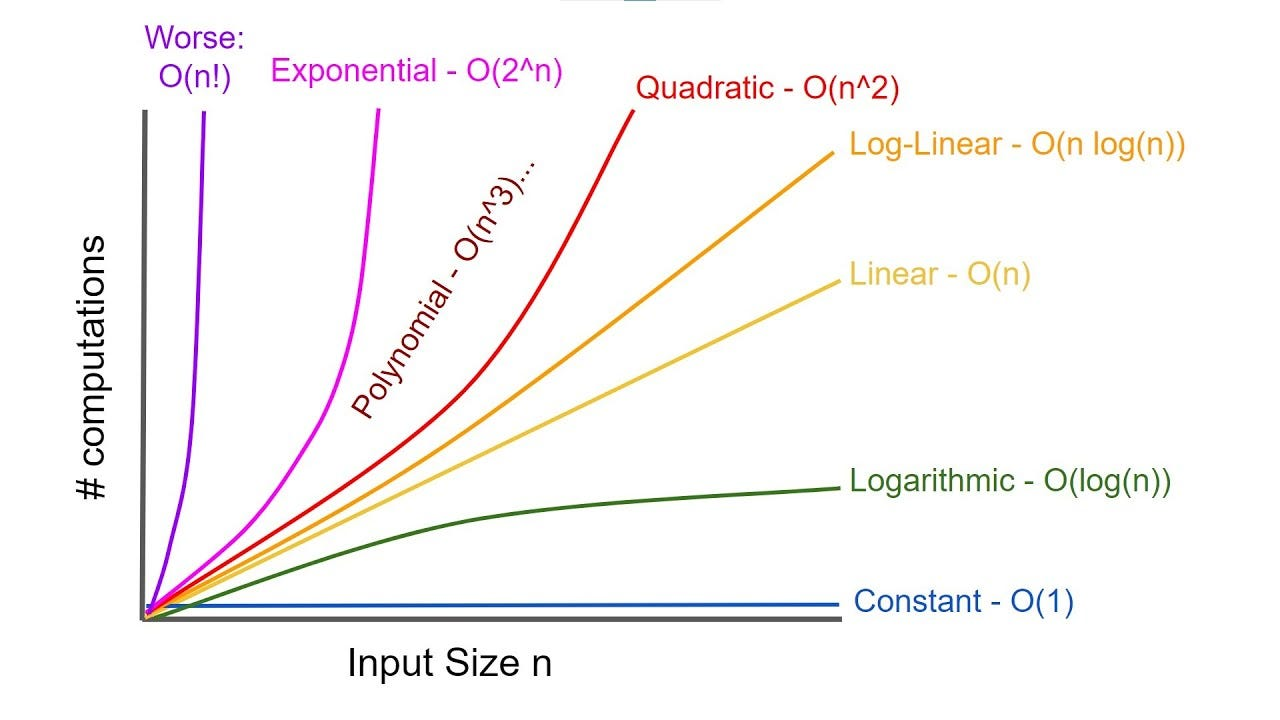